In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
csv_15 = 'comb_df15'
df_15 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + csv_15 + '.csv')

pop_15 = 'pop_df15'
popdf_15 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\\ " + pop_15 + '.csv')

## Univariate

In [3]:
#Variables to delete
del_var = ['aging index 2015', 'ratio of aged population 2015']
all_pop = popdf_15.columns
all_pop = all_pop.to_list()

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

y = df_15['ratio of population [65 years old and over] 2015']  #independent columns
df_15 = df_15.select_dtypes(exclude=['object'])
X = df_15[df_15.columns.difference(['ratio of population [65 years old and over] 2015', 'aging index 2015', 'ratio of aged population 2015'])]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                                 Specs       Score
199                       rates of natural change 2015  473.111538
37    crude death rate [male] (per 1,000 persons) 2015  360.598611
35           crude death rate (per 1,000 persons) 2015  338.938121
212                 ratio of dependent population 2015  316.240159
306         ratio of population [15-64 years old] 2015  297.819055
49   deaths caused by geriatric diseases  (per 100,...  292.347000
36   crude death rate [female] (per 1,000 persons) ...  262.039694
200                    rates of population change 2015  196.496194
52   deaths caused by malignant neoplasms  (per 100...  194.121423
253  ratio of households with members 65 years old ...  139.418975
192         rate of marriages (per 1,000 persons) 2015  119.868049
50   deaths caused by heart diseases [excluding hyp...  115.912513
334  ratio of widowed population [60 years old and ...  113.163795
378  welfare (child) commissioners  (per 100,000 pe...  112.29

## Feature Importance

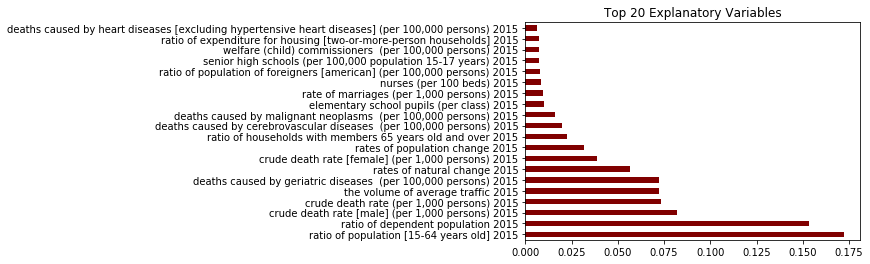

In [8]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100)
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color='#800000', title='Top 20 Explanatory Variables')
plt.show()

In [9]:
fi_df = feat_importances.nlargest(20).to_frame().reset_index()
exp_var = fi_df['index'].to_list()
exp_var.append('ratio of population [65 years old and over] 2015')
add_var = ['prefecture 2015','mma 2015', 'gpkg_key 2015']
#new_var = exp_var + add_var

## Correlation Map

In [10]:
#importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [11]:
r_df = df_15[exp_var]
#new_df = df_15[new_var]
#new_df.to_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\new_df_15.csv", index=False)

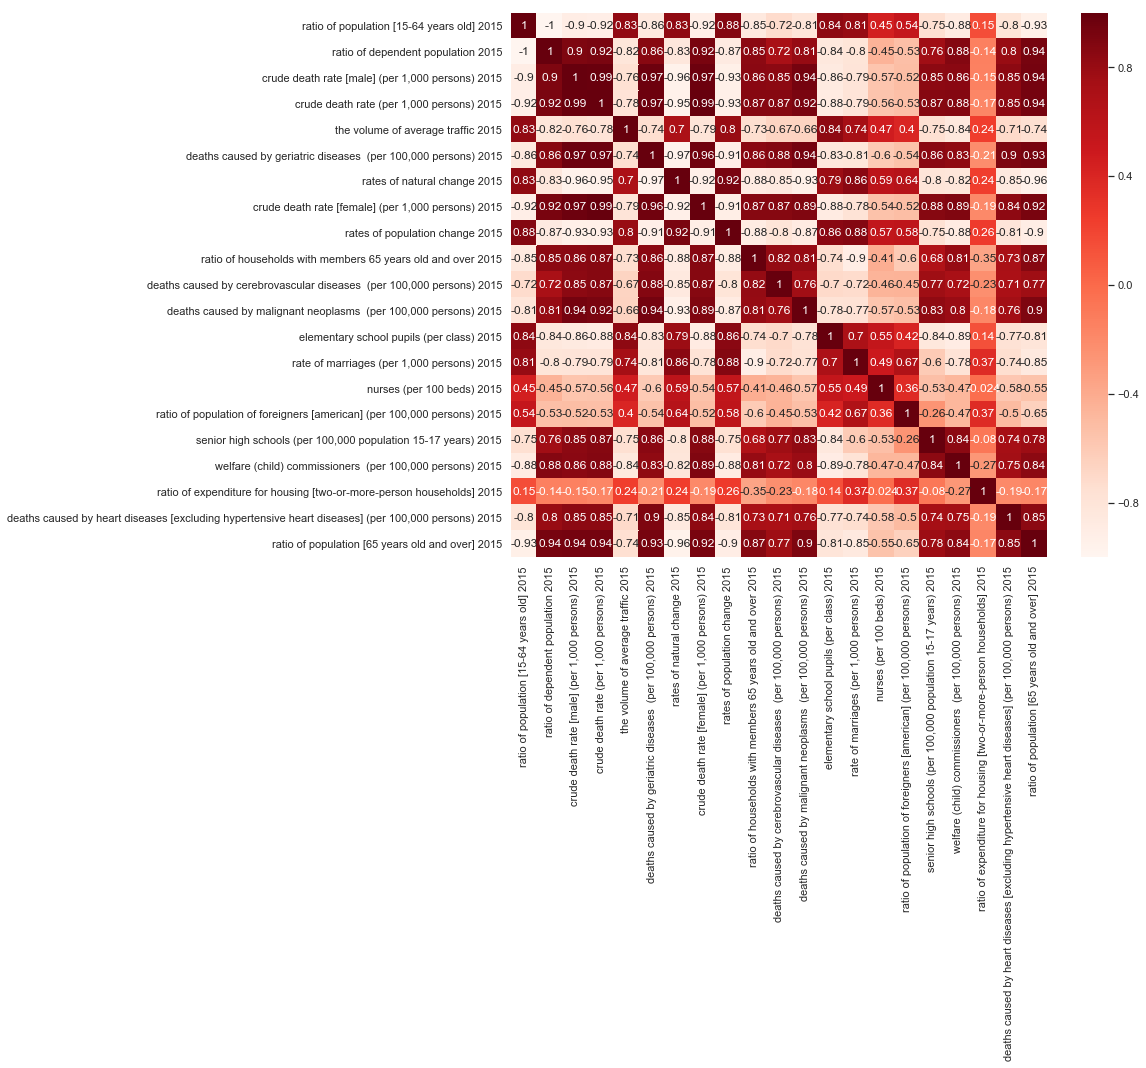

In [25]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = r_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.set(font_scale=0.9)
plt.show()

In [15]:
exp_var.remove('ratio of population [65 years old and over] 2015')

## Top Features Per Topic

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df_15 = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\ comb_df15.csv")

In [ ]:
def create_var(name, df):
    df_name = name + '_df15' #Update for making it suitable for both 10 & 15
    csv_name = df_name + '.csv'
    df_name = pd.read_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\ " + csv_name)
    var_list = list(set(df_name.columns) & set(df.columns))
    
    return var_list

In [ ]:
def feat_imp_plot(name, df):
    y = df['ratio of aged population 2015']
    df = df.drop(['ratio of aged population 2015'], axis=1) #Remove dependent Variable
    df = df.select_dtypes(exclude=['object'])
    var_list = create_var(name, df)
    X = df[var_list]
    
    model = ExtraTreesRegressor(n_estimators=100)
    #model = LinearRegression()
    model.fit(X,y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh', title=name, color='#800000')
    plt.show()

In [ ]:
names = ['pop', 'admb', 'ecnb', 'lab', 'dwell']
for name in names: 
    feat_imp_plot(name, df_15)

In [ ]:
names = ['edu', 'nature', 'wfss', 'hmc', 'fb', 'cas']
for name in names: 
    feat_imp_plot(name, df_15)

## Correlation Matrix for Specified Model

In [ ]:
selected_var = ['crude birth rate (per 1,000 persons) 2015', 
                'crude death rate (per 1,000 persons) 2015', 
                'rate of net-migration 2015', 
               'beds in general hospitals (per 100,000 persons) 2015', 
                'ratio of inhabitable area 2015', 'prefectural income per person 2015', 
               'education expenditure per capita [prefecture + municipality] 2015', 
                'gross agricultural product per agricultural  worker (commercial farm households) 2015', 
               'yearly average of air temperature 2015', 
                'death rate of 65 years old and over (per 1,000 persons) 2015', 
                'total fertility rate 2015',
                'rate of in-migrants from other prefectures 2015', 'rate of out-migrants to other prefectures 2015', 
                'gpkg_key 2015', 'ratio of industrial and quasi-industrial area 2015', 
                'ratio of persons employed in the  primary industry 2015',
               'ratio of persons employed in  the secondary industry 2015', 
               'ratio of persons employed in the tertiary industry 2015', 
              'ratio of high school graduates getting jobs  outside the prefecture 2015', 
              'colleges and universities  (per 100,000 persons) 2015']

df_red15 = df_15[selected_var]

df_red15.to_csv(r"C:\Users\Dhruval\Documents\MACSS\MA Thesis\Aging in Japan\Data\df_red15.csv", index=False)

In [ ]:
# Conducting VIF

import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df_15[['crude birth rate (per 1,000 persons) 2015', 
            'crude death rate (per 1,000 persons) 2015', 
            'ratio of population [65 years old and over] 2015']].dropna()
df = df.rename(columns={'crude birth rate (per 1,000 persons) 2015': "br", 'crude death rate (per 1,000 persons) 2015': "dr", 
                  'ratio of population [65 years old and over] 2015': 'old_pop'})

In [17]:
fm_df = df_15[[ #'ratio of population [65 years old and over] 2015',
            'crude birth rate (per 1,000 persons) 2015', 
            'crude death rate (per 1,000 persons) 2015',
             'rate of net-migration 2015',
             'ratio of persons employed in  the secondary industry 2015', 
             'ratio of high school graduates getting jobs  outside the prefecture 2015', 
              'total fertility rate 2015', 
              'ratio of dids (densely inhabited districts) population 2015']].dropna()


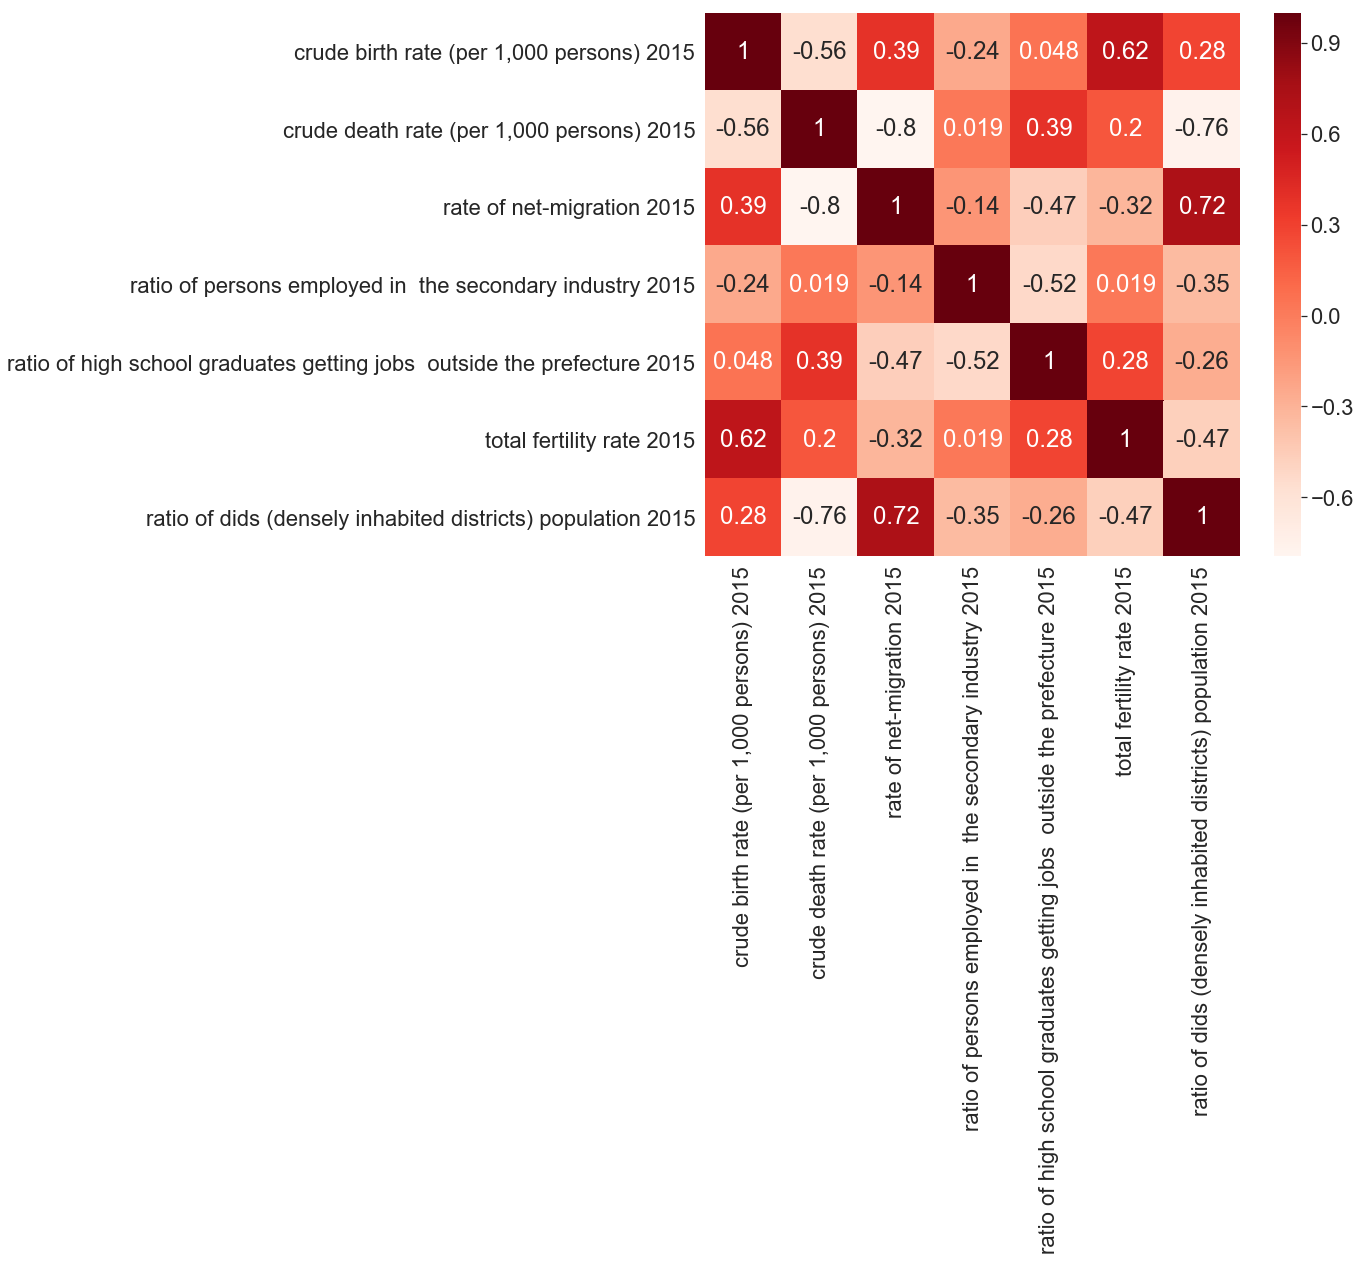

In [22]:
# Correlation matrix 

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = fm_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.set(font_scale=0.1)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [ ]:
df_15 = df_15.select_dtypes(exclude=['object'])
calculate_vif_(df_15, thresh=5.0)

In [ ]:
calculate_vif_(fm_df, thresh=15.0)